In [11]:
url = 'http://www.tepco.co.jp/forecast/html/images/juyo-result-j.csv'
file_dir = '/home/wataru/code/crowdworks/FOR_SKYIT/assignment/pred_app/csv'

In [17]:
import requests
import pandas as pd

In [19]:
dataframe_src = pd.read_csv(os.path.join(file_dir, 'juyo-result-j.csv'), header=1, encoding='shift-jis')

dataframe_src

FileNotFoundError: [Errno 2] No such file or directory: '/home/wataru/code/crowdworks/e_power_pred/juyo-result-j.csv'

In [42]:
%matplotlib inline

import pandas as pd

# データの読み込み（データセット中のYのみロード）
dataframe = pd.read_csv('juyo-result-j.csv', usecols=[7], header=1, encoding='shift-jis')
dataset = dataframe.values.astype('float32')

In [43]:
dataframe

,使用率ピーク時需要電力
0,3372
1,3459
2,2968
3,3464
4,4539
...,...
191,4789
192,4311
193,3217
194,2801


### Scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler

# [0,1]に正規化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [51]:
dataset

array([[0.41579592],
       [0.4425323 ],
       [0.2916411 ],
       [0.4440689 ],
       [0.7744315 ],
       [1.        ],
       [0.9692686 ],
       [0.48371243],
       [0.39520597],
       [0.5500922 ],
       [0.8444992 ],
       [0.77135843],
       [0.7022127 ],
       [0.8583283 ],
       [0.64597416],
       [0.5267364 ],
       [0.67455447],
       [0.87615246],
       [0.752305  ],
       [0.7390903 ],
       [0.88199145],
       [0.66502774],
       [0.51905346],
       [0.7249539 ],
       [0.7283344 ],
       [0.8444992 ],
       [0.7682852 ],
       [0.75322694],
       [0.41610324],
       [0.47910273],
       [0.79748005],
       [0.75968045],
       [0.64874005],
       [0.87615246],
       [0.8703136 ],
       [0.7283344 ],
       [0.738783  ],
       [0.8251384 ],
       [0.9342349 ],
       [0.7599878 ],
       [0.93638605],
       [0.47971725],
       [0.32790413],
       [0.6075599 ],
       [0.56299937],
       [0.5768286 ],
       [0.7433928 ],
       [0.830

### DataSet

In [46]:
# 訓練データとテストデータを分割（時系列の予測が目的のため、ある時点から先をテストデータとする）
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [47]:
train

array([[0.41579586],
       [0.44253224],
       [0.29164106],
       [0.44406885],
       [0.7744314 ],
       [0.99999994],
       [0.9692685 ],
       [0.48371238],
       [0.39520591],
       [0.55009216],
       [0.84449905],
       [0.7713583 ],
       [0.70221263],
       [0.85832816],
       [0.6459741 ],
       [0.5267363 ],
       [0.6745544 ],
       [0.87615234],
       [0.75230485],
       [0.73909026],
       [0.8819913 ],
       [0.6650277 ],
       [0.5190534 ],
       [0.72495383],
       [0.72833437],
       [0.84449905],
       [0.7682851 ],
       [0.7532268 ],
       [0.41610318],
       [0.47910267],
       [0.7974799 ],
       [0.75968033],
       [0.64874   ],
       [0.87615234],
       [0.87031347],
       [0.72833437],
       [0.73878294],
       [0.8251383 ],
       [0.9342348 ],
       [0.75998765],
       [0.9363859 ],
       [0.4797172 ],
       [0.3279041 ],
       [0.60755986],
       [0.5629993 ],
       [0.57682854],
       [0.74339277],
       [0.830

In [52]:
test

array([[0.39612776],
       [0.40319604],
       [0.30547017],
       [0.2642901 ],
       [0.39858633],
       [0.39459127],
       [0.35525507],
       [0.3786109 ],
       [0.387523  ],
       [0.26152426],
       [0.26090962],
       [0.3678549 ],
       [0.40165943],
       [0.39889365],
       [0.462815  ],
       [0.45021504],
       [0.29563612],
       [0.3300553 ],
       [0.42132753],
       [0.38875228],
       [0.3856792 ],
       [0.42931777],
       [0.53503376],
       [0.2606023 ],
       [0.27381682],
       [0.41241544],
       [0.39428395],
       [0.37676704],
       [0.38352793],
       [0.393362  ],
       [0.2802704 ],
       [0.27627534],
       [0.3905962 ],
       [0.39182538],
       [0.393362  ],
       [0.39735705],
       [0.42163485],
       [0.32360166],
       [0.3586355 ],
       [0.5414874 ],
       [0.5866626 ],
       [0.58143824],
       [0.5442532 ],
       [0.7504609 ],
       [0.64874   ],
       [0.55931157],
       [0.81438226],
       [0.656

In [55]:
import numpy as np

# X=[data[t-look_back],...,data[t-1]], Y=data[t]となるデータセットに変換
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# [samples, time steps, features]へ変形
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [58]:
len(trainX)

127

In [59]:
len(trainY)

127

### Model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM

# LSTMにDenseを接続し、数値を予測（MSEで評価）
model = Sequential()

model.add(LSTM(4, input_shape=(look_back, 1))) # input_shape=(系列長T, x_tの次元), output_shape=(units,)
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

2022-07-16 18:55:24.346294: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 18:55:24.400471: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 18:55:24.400750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 18:55:24.401625: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Train

In [61]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2022-07-16 18:55:47.828575: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401


127/127 - 2s - loss: 0.1774 - 2s/epoch - 14ms/step
Epoch 2/100
127/127 - 0s - loss: 0.0698 - 334ms/epoch - 3ms/step
Epoch 3/100
127/127 - 0s - loss: 0.0508 - 436ms/epoch - 3ms/step
Epoch 4/100
127/127 - 1s - loss: 0.0463 - 589ms/epoch - 5ms/step
Epoch 5/100
127/127 - 1s - loss: 0.0428 - 579ms/epoch - 5ms/step
Epoch 6/100
127/127 - 0s - loss: 0.0396 - 347ms/epoch - 3ms/step
Epoch 7/100
127/127 - 0s - loss: 0.0375 - 318ms/epoch - 3ms/step
Epoch 8/100
127/127 - 1s - loss: 0.0359 - 519ms/epoch - 4ms/step
Epoch 9/100
127/127 - 0s - loss: 0.0350 - 365ms/epoch - 3ms/step
Epoch 10/100
127/127 - 0s - loss: 0.0346 - 201ms/epoch - 2ms/step
Epoch 11/100
127/127 - 0s - loss: 0.0347 - 315ms/epoch - 2ms/step
Epoch 12/100
127/127 - 0s - loss: 0.0347 - 342ms/epoch - 3ms/step
Epoch 13/100
127/127 - 1s - loss: 0.0342 - 737ms/epoch - 6ms/step
Epoch 14/100
127/127 - 1s - loss: 0.0337 - 822ms/epoch - 6ms/step
Epoch 15/100
127/127 - 1s - loss: 0.0342 - 827ms/epoch - 7ms/step
Epoch 16/100
127/127 - 1s - loss:

In [63]:
import math
from sklearn.metrics import mean_squared_error

# テストデータに対する予測（評価のため訓練データも）
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 正規化を元に戻す
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 平均二乗誤差のルートで評価
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train RMSE: 0.18
Test RMSE: 0.15


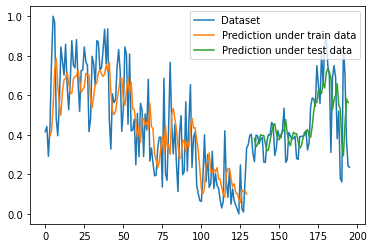

In [64]:
import matplotlib.pyplot as plt

# 訓練データ部分の予測データ
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# テストデータ部分の予測データ
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(trainPredictPlot, label='Prediction under train data')
plt.plot(testPredictPlot, label='Prediction under test data')
plt.legend()
plt.show()